In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
from sklearn import preprocessing

In [2]:
rcParams['figure.figsize'] = 8, 5
plt.rc('grid', linestyle="--", color='gray')

# https://learnui.design/tools/data-color-picker.html#palette
colors = ['#33508f', '#ff5d68', '#ffa600','#af4f9b']

In [3]:
results = pd.read_csv("results_anonymized_bala1.csv")
results.head()

,ED/ES,Vendor,Centre,Dice LV,Jaccard LV,Hausdorff LV,ASSD LV,Dice RV,Jaccard RV,Hausdorff RV,ASSD RV,Dice MYO,Jaccard MYO,Hausdorff MYO,ASSD MYO
0,ED,D,5,0.896296,0.812080,15.730452,0.584715,0.846773,0.734264,10.125773,2.953452,0.734360,0.580228,12.925902,1.399624
1,ES,A,6,0.699337,0.537677,24.500000,3.265406,0.915377,0.843958,20.000000,0.745179,0.903249,0.823568,21.828880,1.117425
2,ES,B,3,0.943194,0.892496,10.106240,0.226953,0.955148,0.914146,10.000000,0.343263,0.911502,0.837394,13.138768,0.508923
3,ED,A,1,0.847820,0.735840,21.616324,1.808232,0.959369,0.921910,5.939556,0.339471,0.863919,0.760437,15.368554,0.934459
4,ES,C,4,0.850280,0.739554,13.685488,0.835847,0.918845,0.849874,7.421998,0.414947,0.874702,0.777307,12.769288,0.685188


In [4]:
print("-- Segmentation scores --\n")
print("Min Jaccard LV: {:.4f} / Max Jaccard LV: {:.4f}".format(results["Jaccard LV"].min(), results["Jaccard LV"].max()))
print("Min Jaccard RV: {:.4f} / Max Jaccard RV: {:.4f}".format(results["Jaccard RV"].min(), results["Jaccard RV"].max()))
print("Min Jaccard MYO: {:.4f} / Max Jaccard MYO: {:.4f}".format(results["Jaccard MYO"].min(), results["Jaccard MYO"].max()))

print()
print("Min Dice LV: {:.4f} / Max Dice LV: {:.4f}".format(results["Dice LV"].min(), results["Dice LV"].max()))
print("Min Dice RV: {:.4f} / Max Dice RV: {:.4f}".format(results["Dice RV"].min(), results["Dice RV"].max()))
print("Min Dice MYO: {:.4f} / Max Dice MYO: {:.4f}".format(results["Dice MYO"].min(), results["Dice MYO"].max()))

print()
print("Min Hausdorff LV: {:.4f} / Max Hausdorff LV: {:.4f}".format(results["Hausdorff LV"].min(), results["Hausdorff LV"].max()))
print("Min Hausdorff RV: {:.4f} / Max Hausdorff RV: {:.4f}".format(results["Hausdorff RV"].min(), results["Hausdorff RV"].max()))
print("Min Hausdorff MYO: {:.4f} / Max Hausdorff MYO: {:.4f}".format(results["Hausdorff MYO"].min(), results["Hausdorff MYO"].max()))

print()
print("Min ASSD LV: {:.4f} / Max ASSD LV: {:.4f}".format(results["ASSD LV"].min(), results["ASSD LV"].max()))
print("Min ASSD RV: {:.4f} / Max ASSD RV: {:.4f}".format(results["ASSD RV"].min(), results["ASSD RV"].max()))
print("Min ASSD MYO: {:.4f} / Max ASSD MYO: {:.4f}".format(results["ASSD MYO"].min(), results["ASSD MYO"].max()))

-- Segmentation scores --

Min Jaccard LV: 0.1988 / Max Jaccard LV: 0.9536
Min Jaccard RV: 0.4765 / Max Jaccard RV: 0.9633
Min Jaccard MYO: 0.5065 / Max Jaccard MYO: 0.8574

Min Dice LV: 0.3317 / Max Dice LV: 0.9762
Min Dice RV: 0.6455 / Max Dice RV: 0.9813
Min Dice MYO: 0.6724 / Max Dice MYO: 0.9233

Min Hausdorff LV: 2.6440 / Max Hausdorff LV: 71.8858
Min Hausdorff RV: 2.0993 / Max Hausdorff RV: 62.3991
Min Hausdorff MYO: 4.1985 / Max Hausdorff MYO: 113.9245

Min ASSD LV: 0.0982 / Max ASSD LV: 12.8936
Min ASSD RV: 0.1065 / Max ASSD RV: 3.9482
Min ASSD MYO: 0.2507 / Max ASSD MYO: 2.4906


KeyError: 'Vendor'

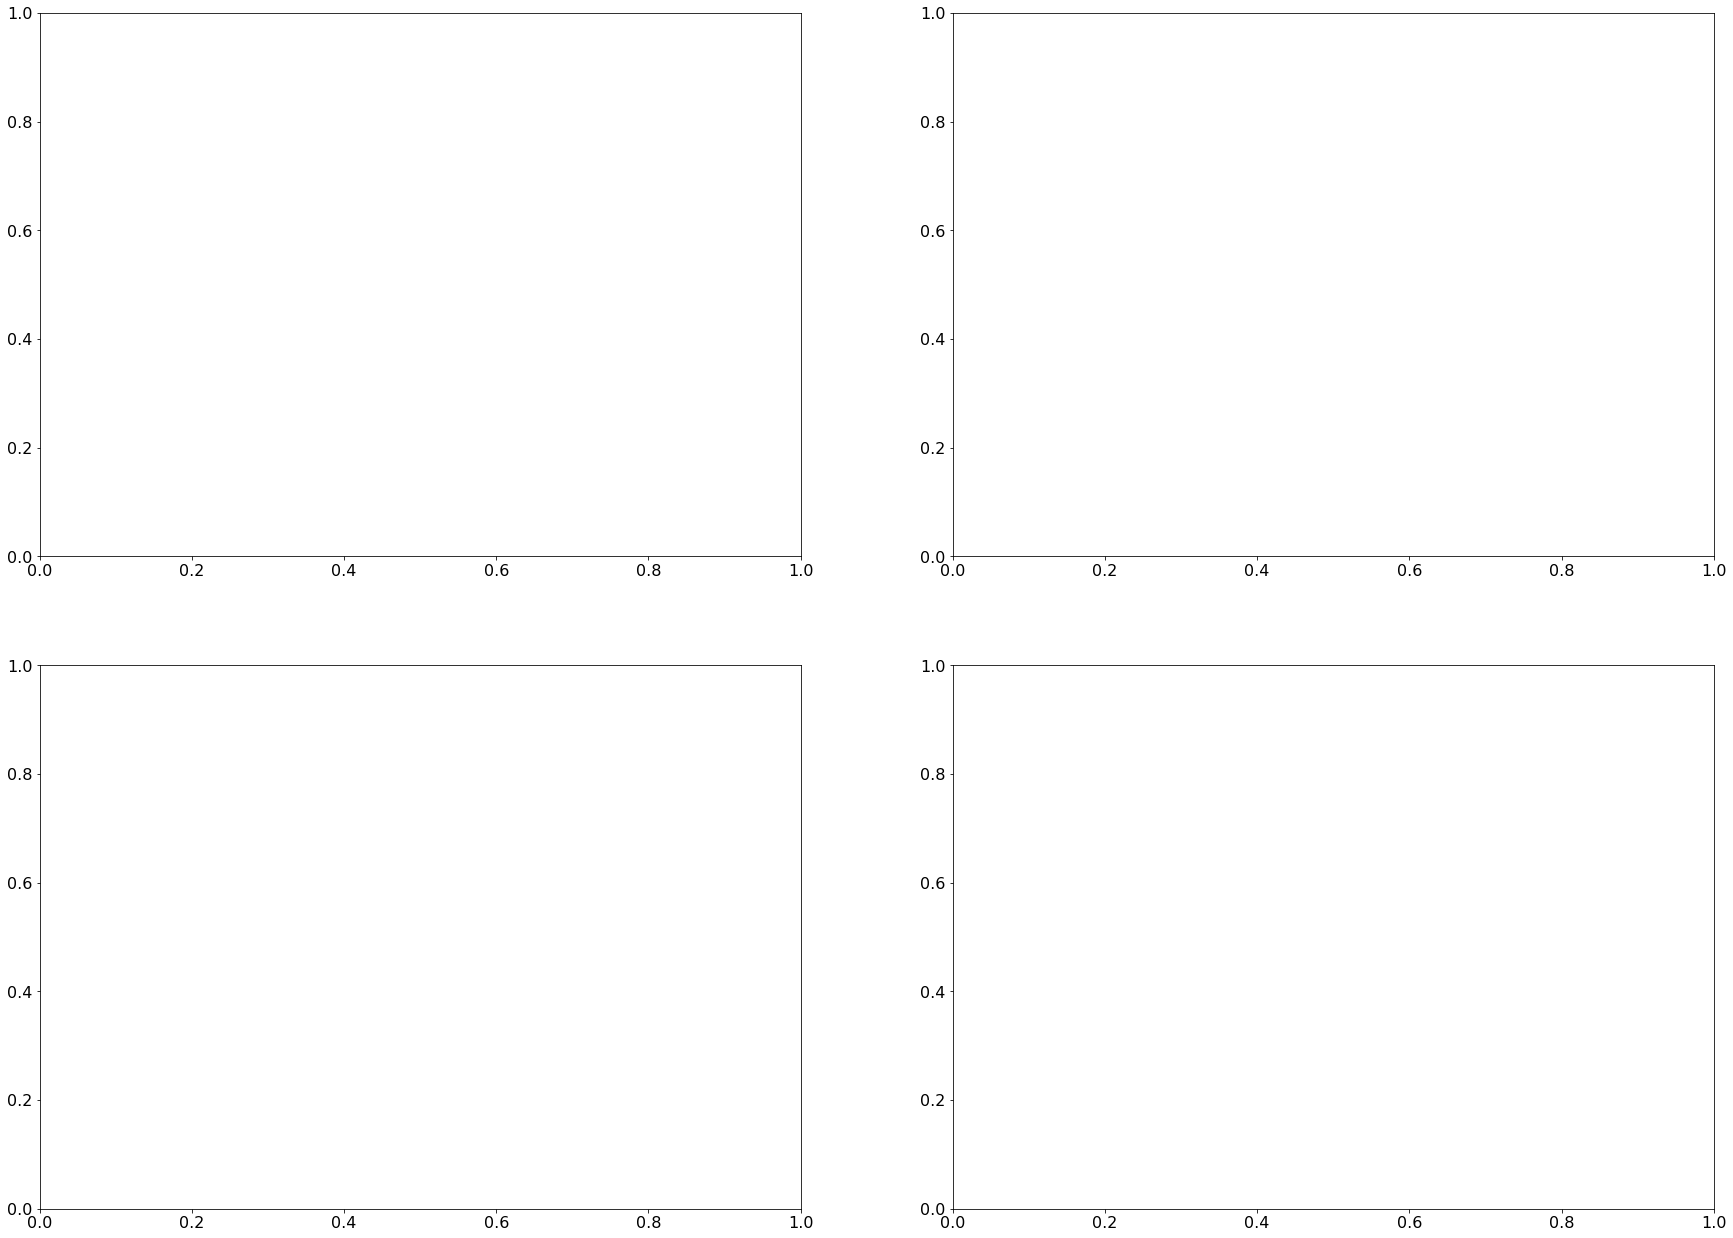

In [15]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("DICE Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean DICE LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Dice RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean DICE RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("DICE Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean DICE MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("DICE Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean DICE Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('dice_vendor.png', bbox_inches='tight', dpi=160)

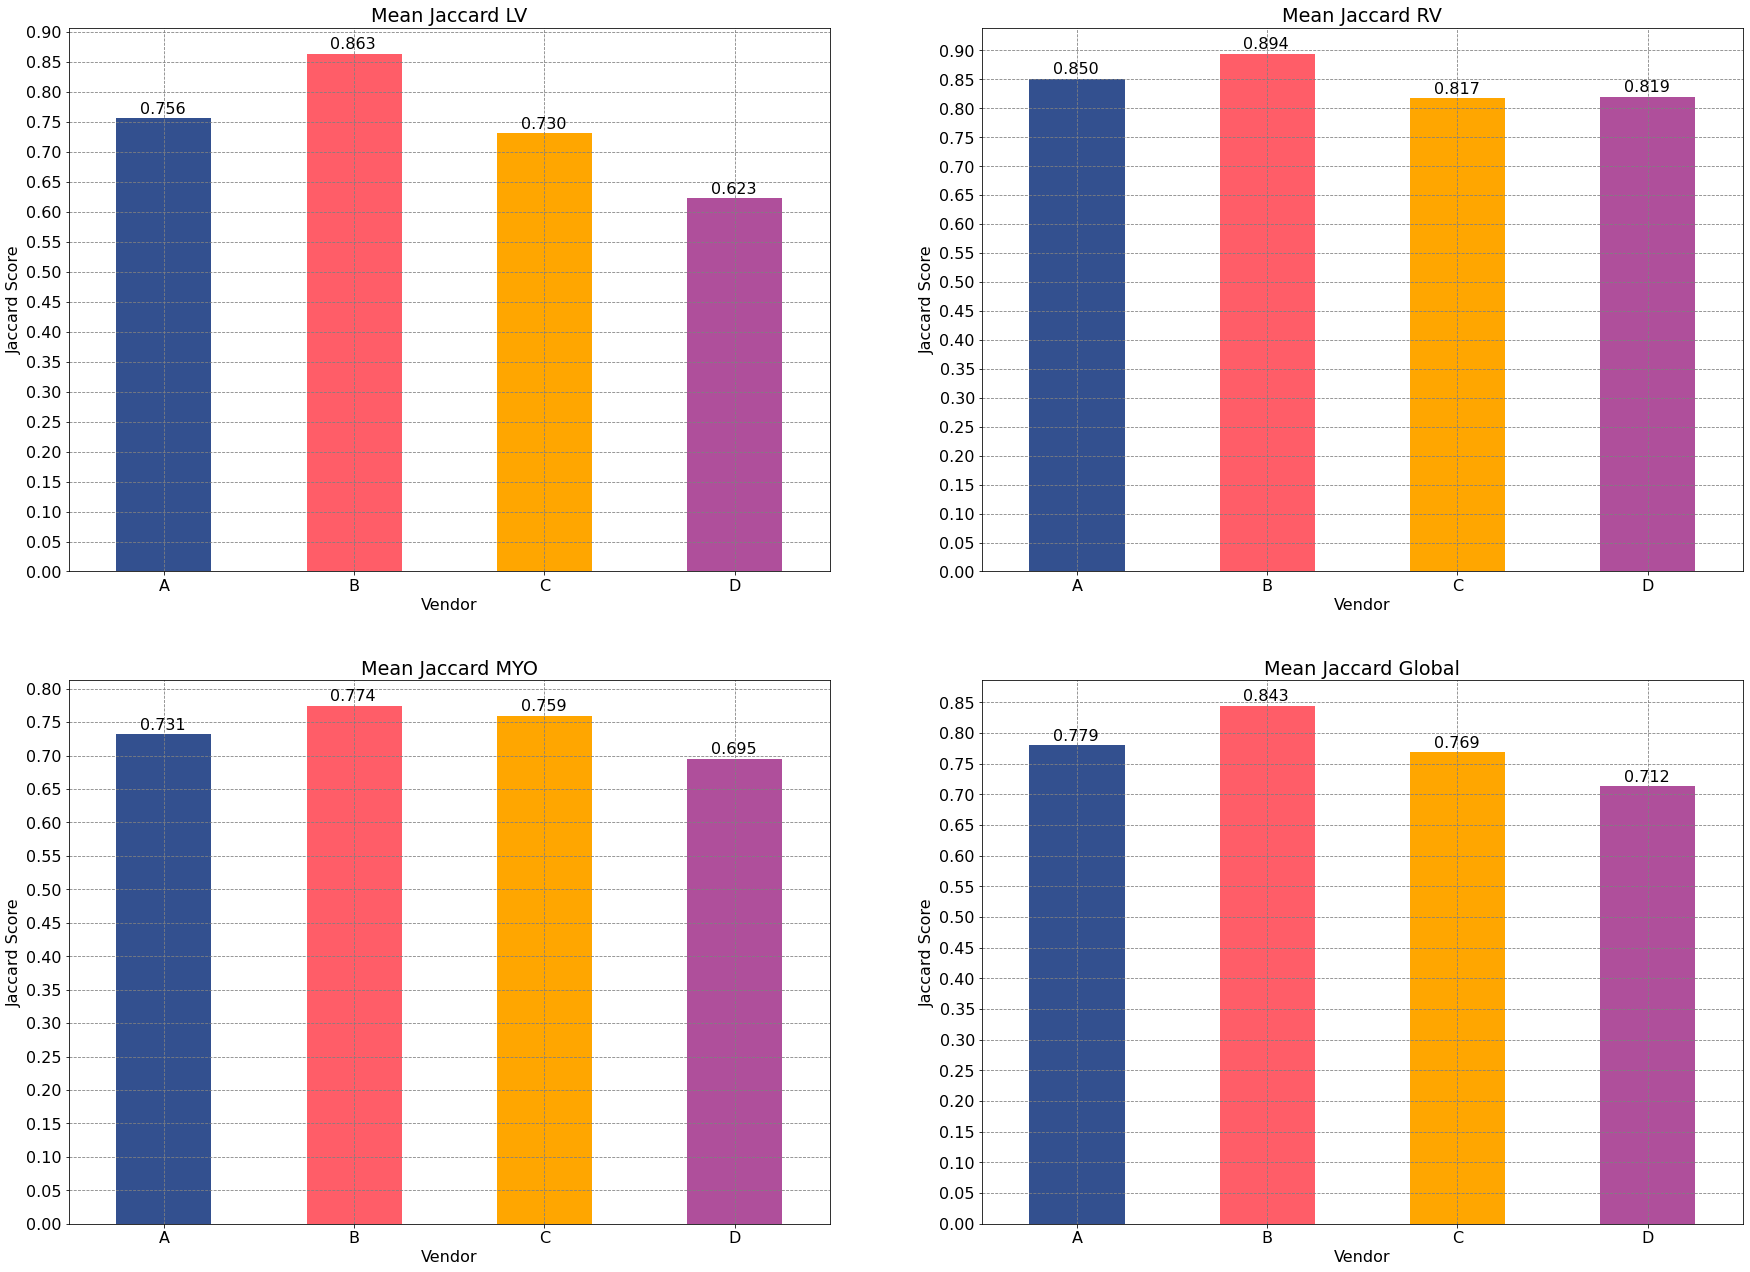

In [6]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean Jaccard LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Jaccard Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean Jaccard RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Jaccard Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean Jaccard MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Jaccard Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean Jaccard Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('jaccard_vendor.png', bbox_inches='tight', dpi=160)

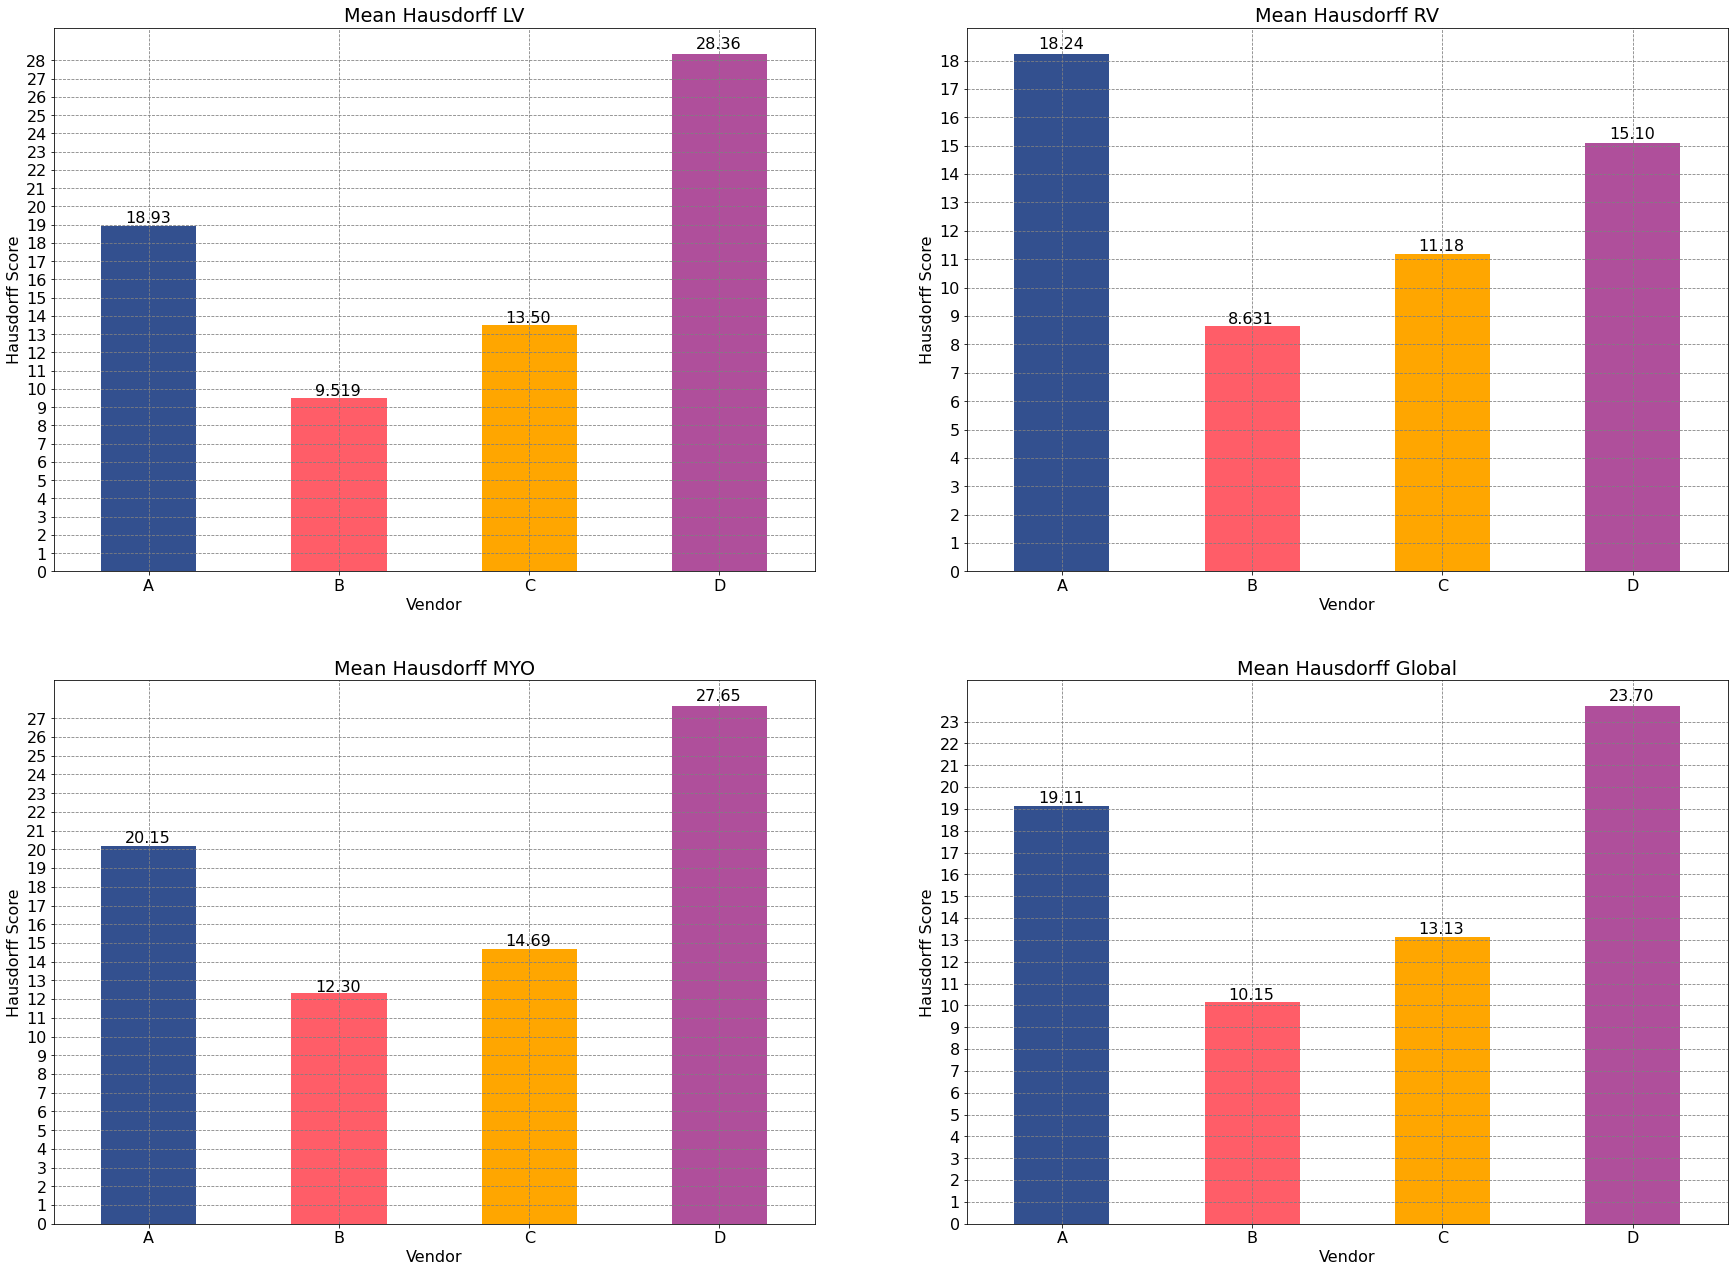

In [7]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Hausdorff Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff LV"].mean().max()+0.05, 1))
ax1[0].set_title("Mean Hausdorff LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Hausdorff Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff RV"].mean().max()+0.05, 1))
ax1[1].set_title("Mean Hausdorff RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff MYO"].mean().max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Hausdorff Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[1].set_title("Mean Hausdorff Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('hausdorff_vendor.png', bbox_inches='tight', dpi=160)

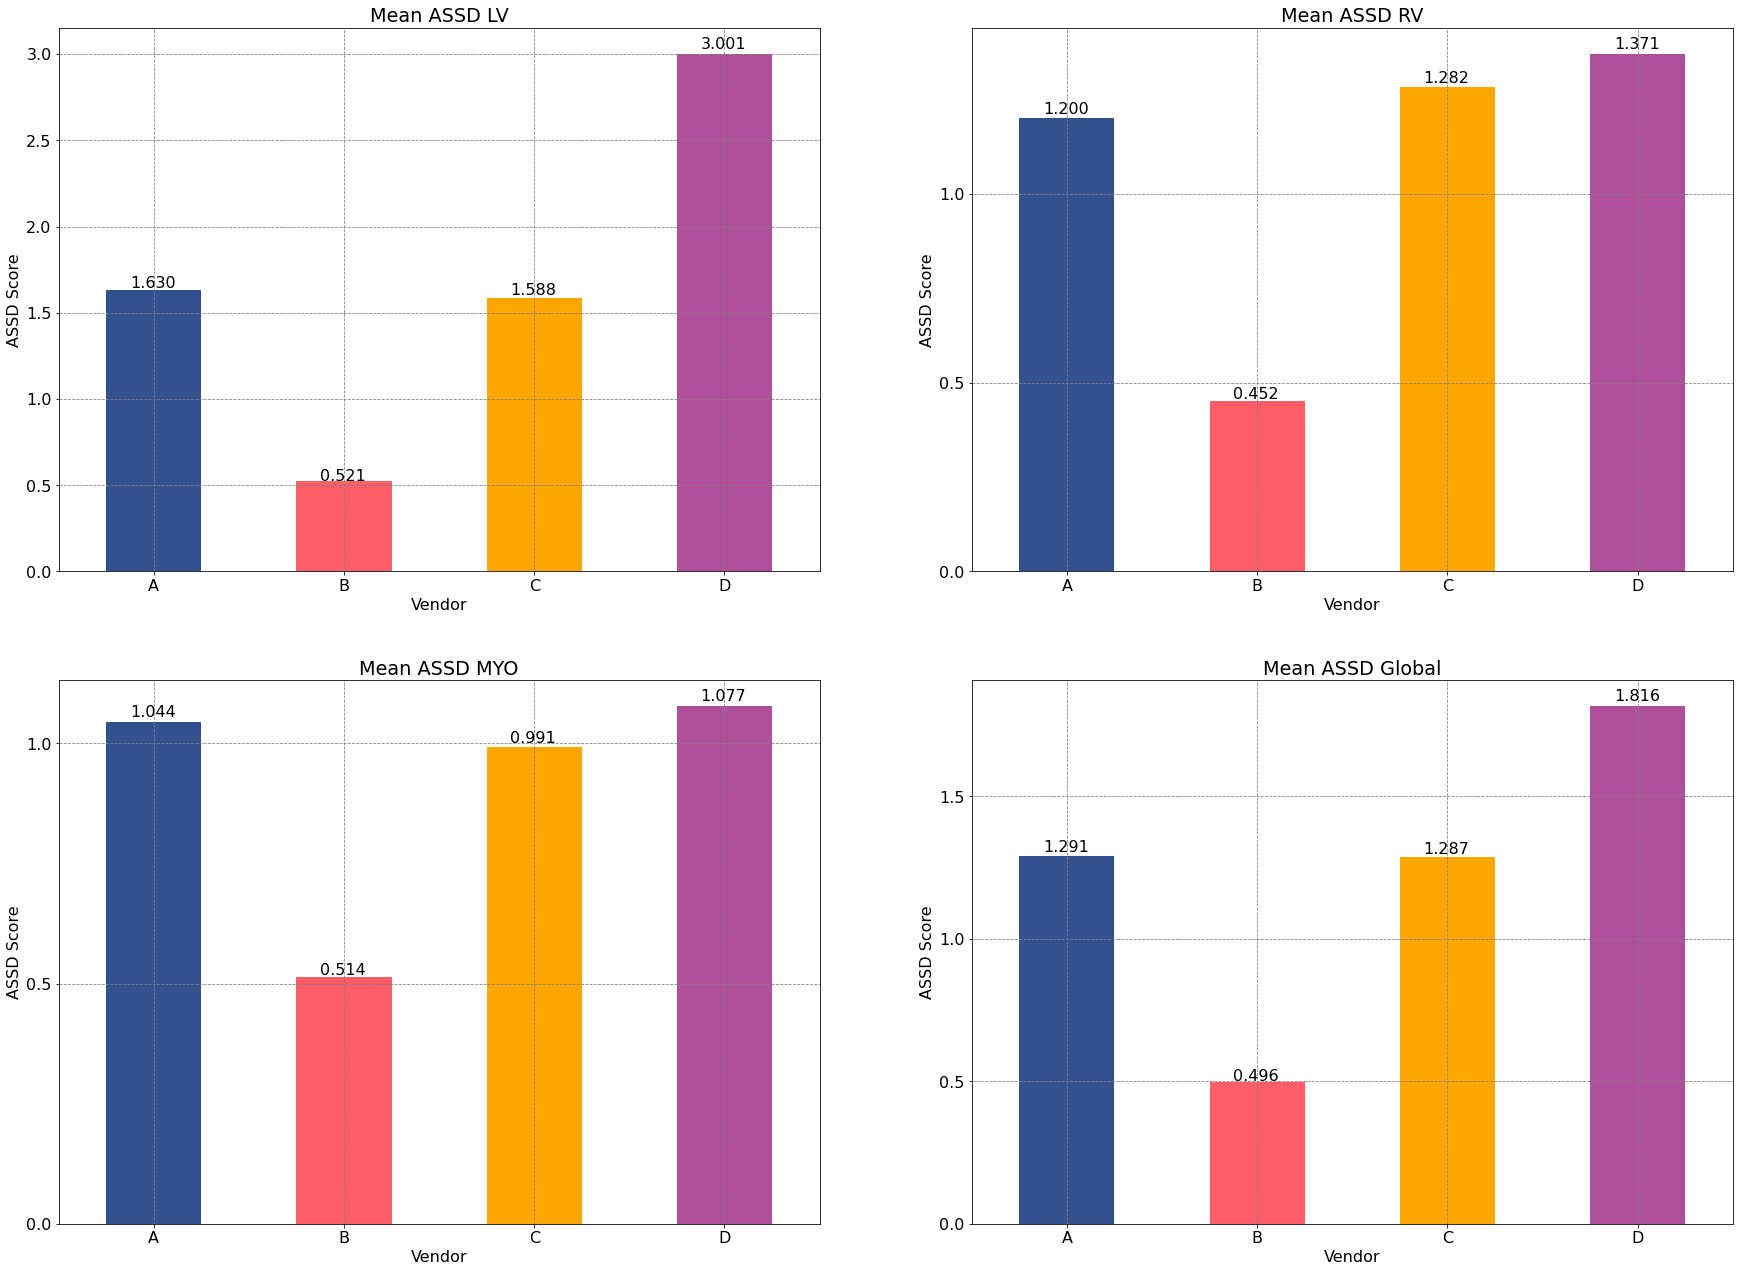

In [8]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("ASSD Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD LV"].mean().max()+0.05, 0.5))
ax1[0].set_title("Mean ASSD LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("ASSD Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD RV"].mean().max()+0.05, 0.5))
ax1[1].set_title("Mean ASSD RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("ASSD Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD MYO"].mean().max()+0.05, 0.5))
ax2[0].set_title("Mean ASSD MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('assd_vendor.png', bbox_inches='tight', dpi=160)

#### Average results

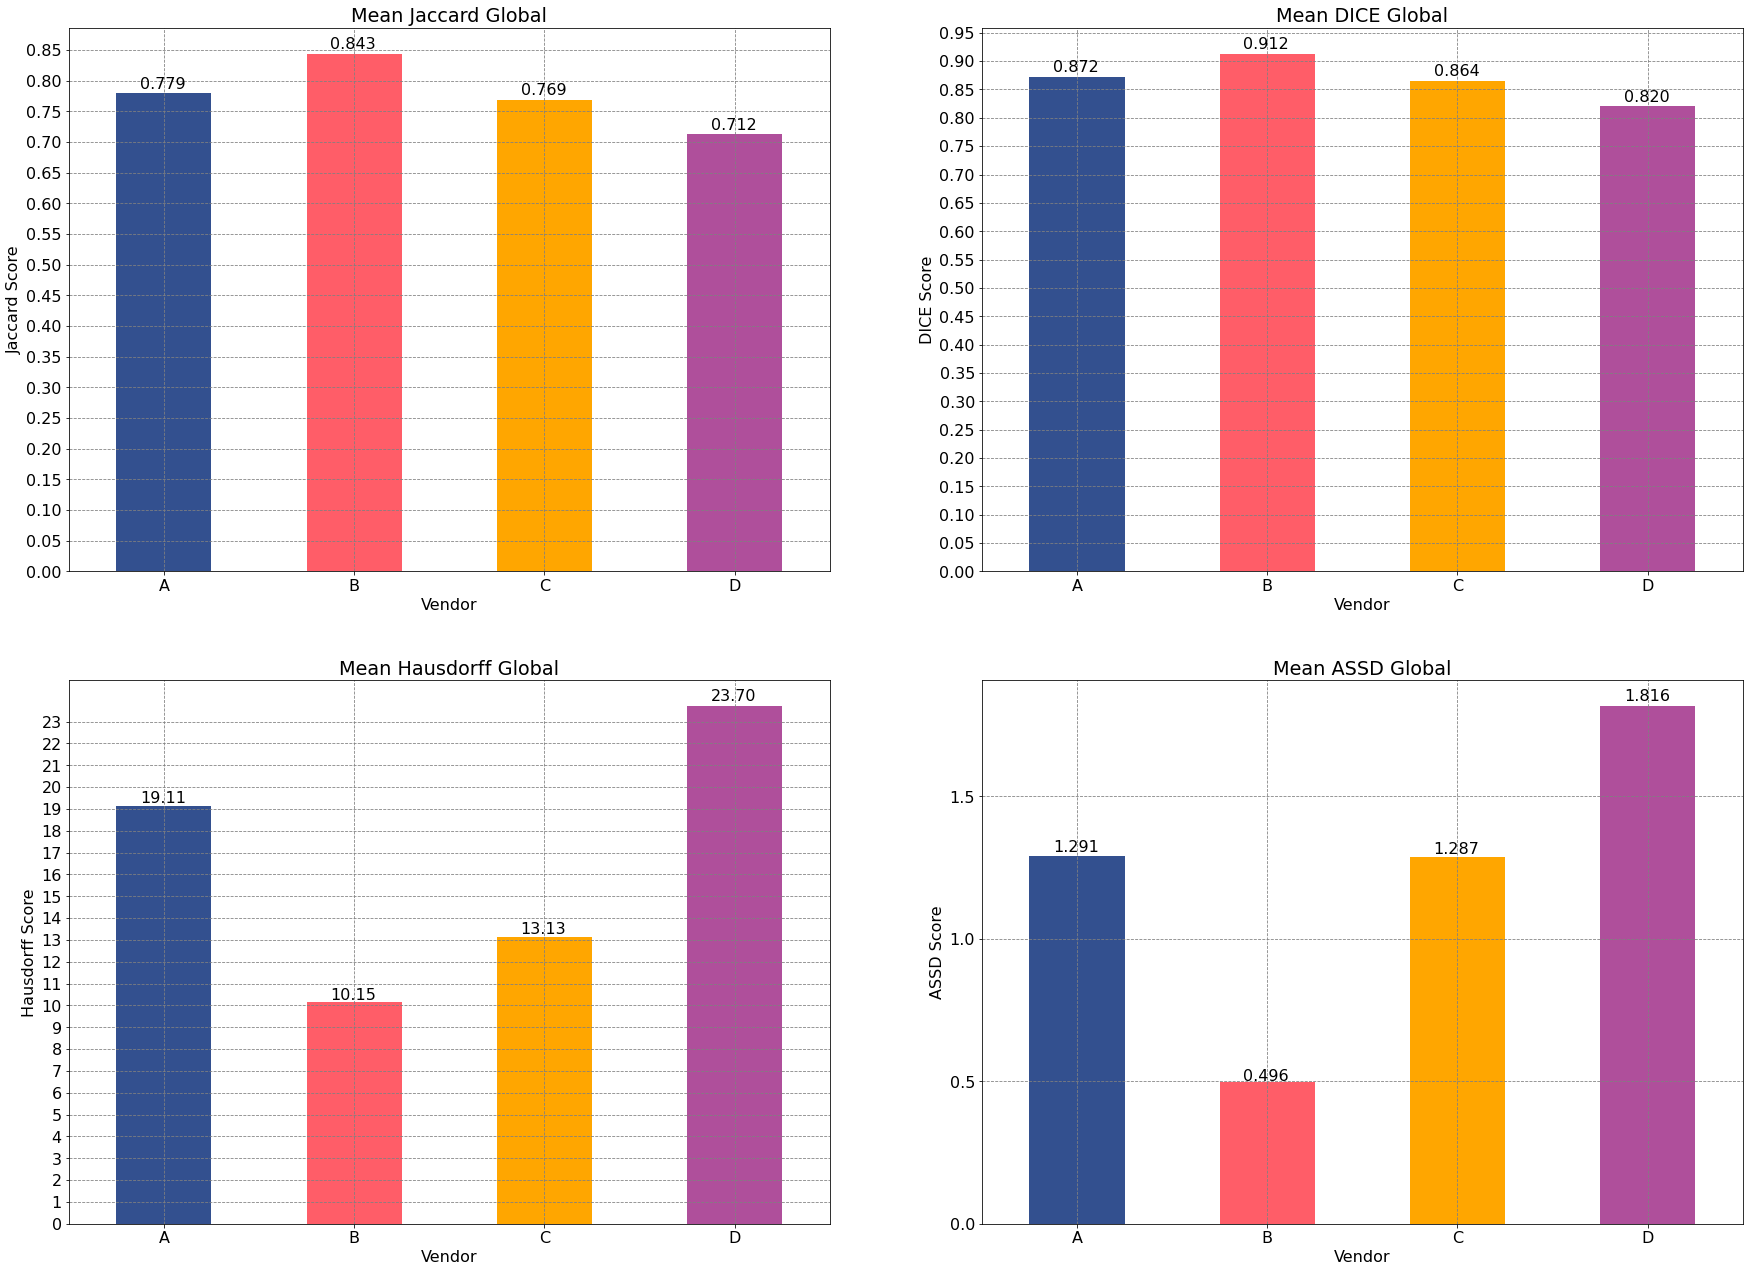

In [9]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[0].set_title("Mean Jaccard Global")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[1].set_title("Mean DICE Global")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff Global")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )

for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('mean_metrics_vendor.png', bbox_inches='tight', dpi=160)

## Ranking Metric

The details for computing the final performance rank are the following:

  1. The weighted average metric for each region (LV, RV and MYO) is computed;
  2. A min-max normalization is computed across subjects;
  3. The final normalized metrics are averaged to extract one unique value between 0 and 1;
  4. This final value is used to rank the participants.
  
Missing results in the submission will get a zero for Dice and Jaccard coefficients and the equivalent worst value for Hausdorff and surface distances. See the following example (with only the LV results) for clarity:

In [10]:
results['Dice Mean'] = results[["Dice LV", "Dice RV", "Dice MYO"]].mean(axis=1)
results['Jaccard Mean'] = results[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean(axis=1)
results['Hausdorff Mean'] = results[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean(axis=1)
results['ASSD Mean'] = results[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean(axis=1)

In [11]:
x = results[["Dice Mean", "Jaccard Mean", "Hausdorff Mean", "ASSD Mean"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
results = pd.DataFrame(x_scaled)

In [12]:
print(f"Normalized DICE: {results[0].mean()}")
print(f"Normalized Jaccard: {results[1].mean()}")
print(f"Normalized Hausdorff: {results[2].mean()}")
print(f"Normalized ASSD: {results[3].mean()}")

print(f"Computed final metric: {results.values.mean()}")

Normalized DICE: 0.7232038495604709
Normalized Jaccard: 0.6959462391995757
Normalized Hausdorff: 0.2849272724066942
Normalized ASSD: 0.20996822337162646
Computed final metric: 0.47851139613459176


In [14]:
(results[0].mean() + results[1].mean()+ (1-results[2].mean())+ (1-results[3].mean()))/4

0.7310636482454315